In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1545231191305068545,1545180657931919362,2022-07-08 02:19:59 UTC,2022-07-08,02:19:59,0,2965176233,wetheconsumers,WeTheConsumers,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jim_Jordan', 'name': 'Rep. J...",NaN,NaN,NaN,NaN
1,1545231184401027072,1545231184401027072,2022-07-08 02:19:58 UTC,2022-07-08,02:19:58,0,39375008,nancyyoungblut,NSY,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1545231182836776961,1545143027299221505,2022-07-08 02:19:57 UTC,2022-07-08,02:19:57,0,1489026854333956098,jt2481,Jeff,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Tmess89', 'name': 'Tim Messe...",NaN,NaN,NaN,NaN
3,1545231180122955776,1545231180122955776,2022-07-08 02:19:57 UTC,2022-07-08,02:19:57,0,1119286872121851906,africatimesofn1,Africa Times of News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1545231173533720576,1545231173533720576,2022-07-08 02:19:55 UTC,2022-07-08,02:19:55,0,1489973271370076165,wilhelmormstein,🔥Wilhelm Gottsreich Sigismond von Ormstein🔥,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
data = data[["username", "tweet", "language"]]

In [4]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [5]:
data["language"].value_counts()

en     9046
pt      453
qme      76
in       55
it       50
ca       49
es       45
und      44
ru       42
ja       15
vi       15
hi       12
de       10
fi        9
ur        9
fr        9
zh        8
tl        8
nl        7
th        6
qam       5
tr        3
ar        3
sv        2
pl        2
cs        2
uk        2
et        2
qht       2
zxx       1
eu        1
si        1
ko        1
cy        1
no        1
da        1
el        1
bg        1
ro        1
Name: language, dtype: int64

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


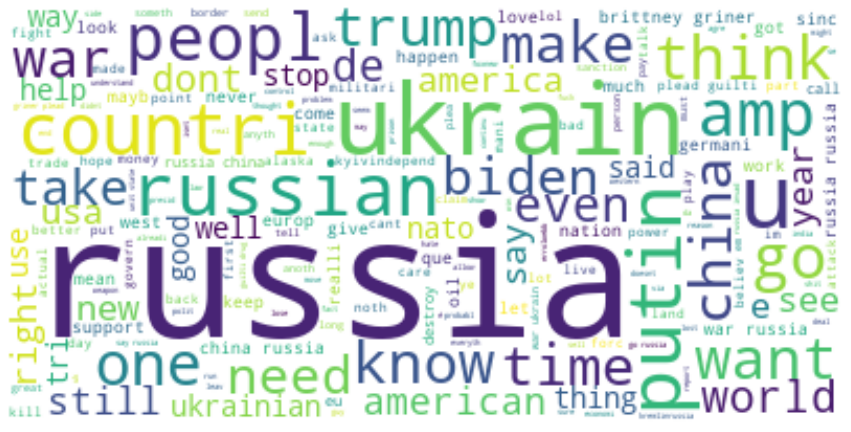

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,jimjordan “russia listen ukrain need us favor ...,0.141,0.185,0.675
1,russia appar use internationalspacest war ukrain,0.000,0.438,0.562
2,don't care she special american detaine russi...,0.000,0.435,0.565
3,ukrainerussia live news donetsk local brace mo...,0.000,0.326,0.674
4,uh oh gig grift bori first go macron powerle...,0.000,0.132,0.868


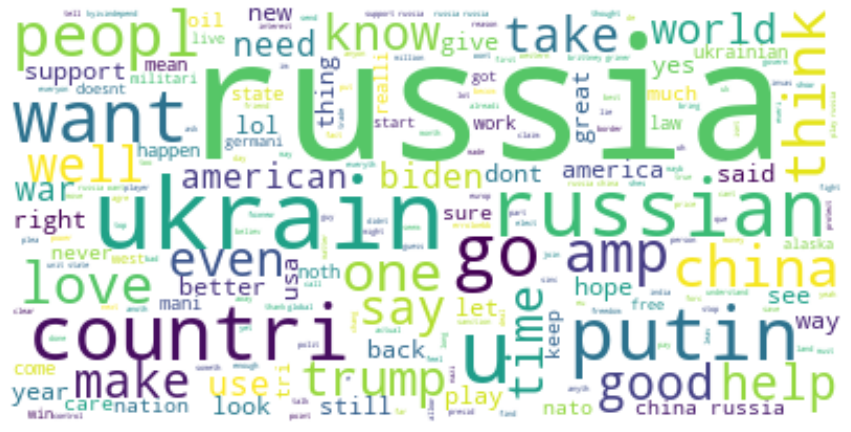

In [12]:
# Positive Sentiments
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

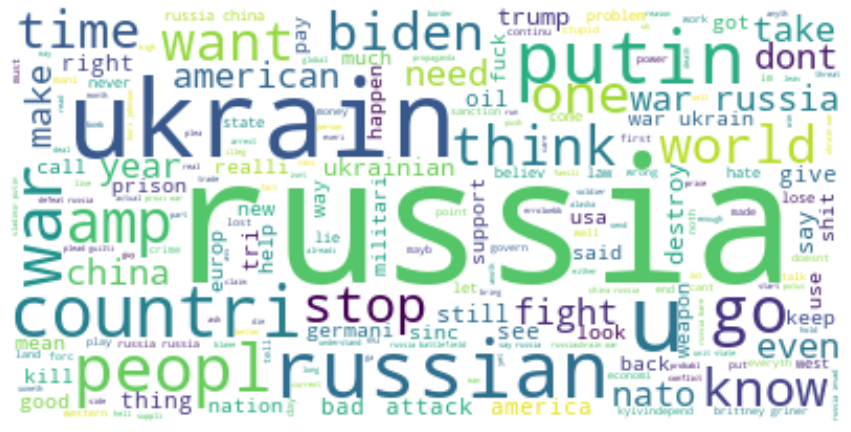

In [13]:
# Negative Sentiments
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()